# Introduction
In this notebook, we will be examining the Breast Cancer Wisconsin (Diagnostic) Data Set from the UCI Machine Learning Repository. The data set can be found [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). The data set contains 569 instances of data, each with 32 features. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The goal is to predict whether the mass is benign or malignant.

### Table of Contents
- [Downloading and Loading the Breast Cancer Wisconsin (Diagnostic) Data Set](#Downloading-and-Loading-the-Breast-Cancer-Wisconsin-(Diagnostic)-Data-Set)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Building of Logistic Regression Models with and without Outliers](#Model-Building-of-Logistic-Regression-Models-with-and-without-Outliers)
- [Conclusion](#Conclusion)

# Downloading and Loading the Breast Cancer Wisconsin (Diagnostic) Data Set

In [1]:
from kaggle import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files('uciml/breast-cancer-wisconsin-data', path='./data', unzip=True)

In [2]:
import pandas as pd

df = pd.read_csv('./data/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Replace Malignant and Benign with 1 and 0 and drop id and Unnamed: 32 columns
df.diagnosis.replace({'M': 1, 'B': 0}, inplace=True)
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [5]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Exploratory Data Analysis

/usr/local/anaconda3/envs/breast-cancer-diagnosis-pred/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


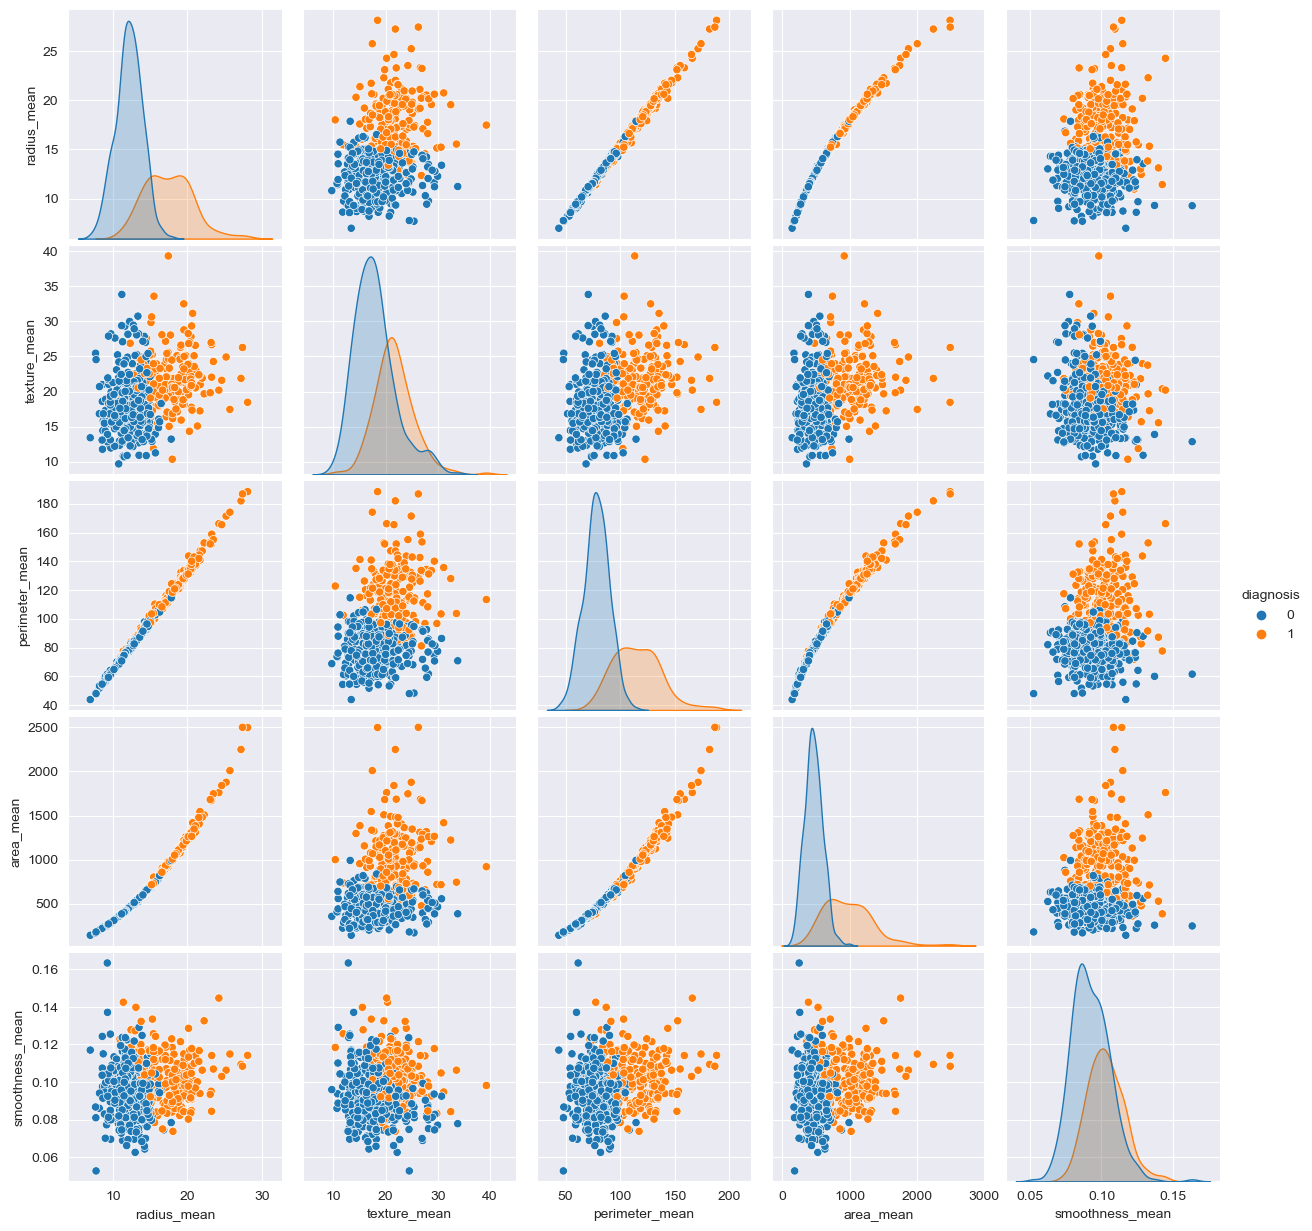

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

<Axes: >

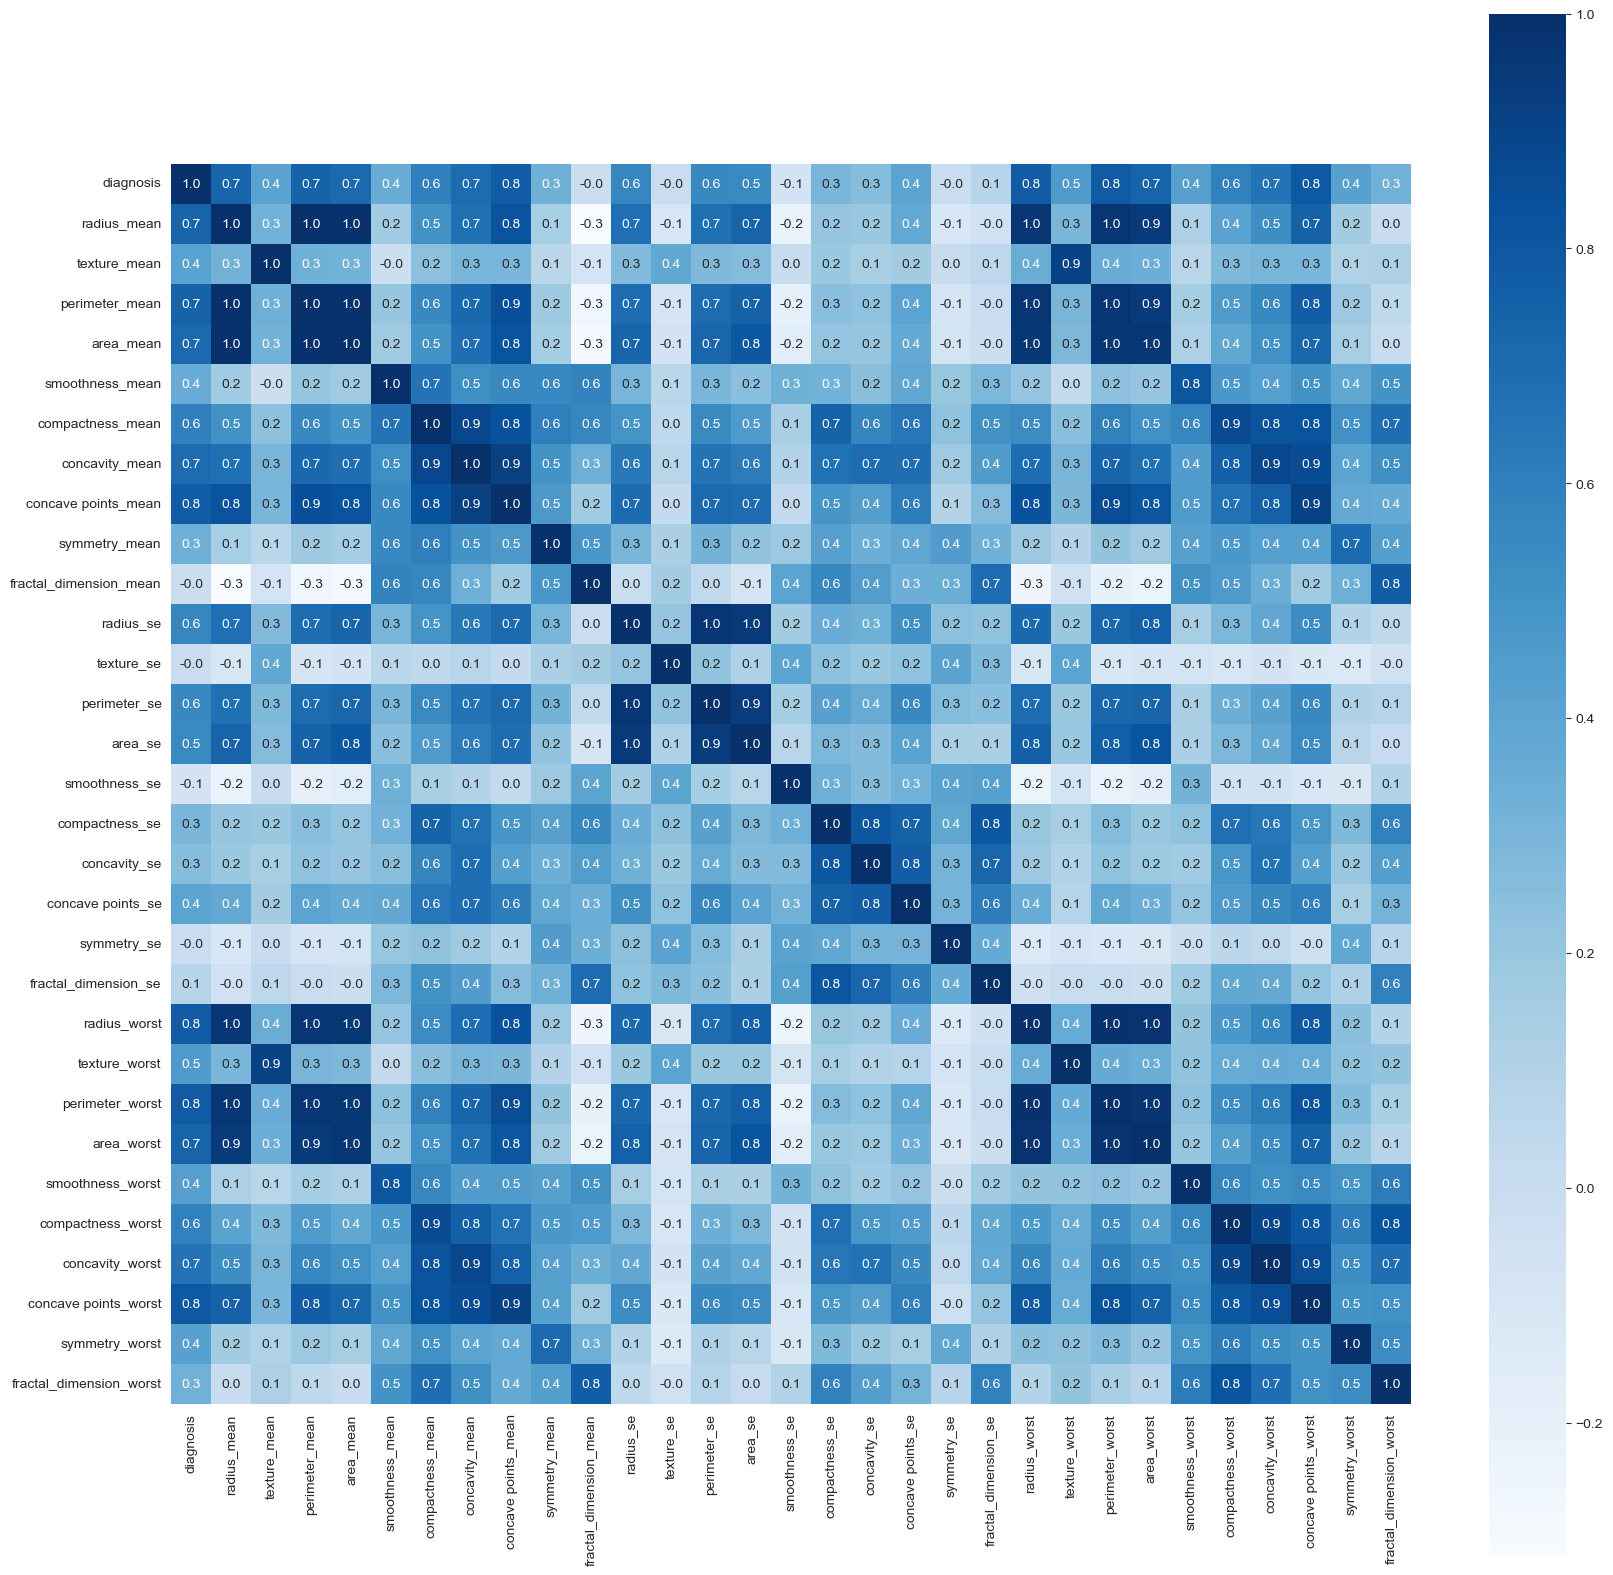

In [7]:
corr = df.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(corr, annot=True, fmt='.1f', square=True, cmap='Blues')

# Model Building of Logistic Regression Models with and without Outliers

In [8]:
from sklearnex.model_selection import train_test_split
from sklearnex.linear_model import LogisticRegression

X = df.drop('diagnosis', axis=1)
y = df.diagnosis

X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X, y, test_size=0.2, random_state=42)

lr_wo = LogisticRegression(max_iter=10000)

lr_wo.fit(X_train_wo, y_train_wo)

LogisticRegression(max_iter=10000)

In [9]:
# Function for removing outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers
for column in df.columns:
    df = remove_outliers(df, column)

In [10]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_without_outliers = LogisticRegression(max_iter=10000)

lr_without_outliers.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = lr_wo.predict(X_test_wo)

# Without outliers
accuracy_wo = accuracy_score(y_test_wo, y_pred)
mse_wo = mean_squared_error(y_test_wo, y_pred)
mae_wo = mean_absolute_error(y_test_wo, y_pred)
r2_wo = r2_score(y_test_wo, y_pred)
cmatrix_wo = confusion_matrix(y_test_wo, y_pred)

y_pred = lr_without_outliers.predict(X_test)

# With outliers
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cmatrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: Without Outliers: {np.round(accuracy_wo, 2)}, With Outliers: {np.round(accuracy, 2)}')
print(f'RMSE: Without Outliers: {np.round(mse_wo ** 0.5, 2)}, With Outliers: {np.round(mse ** 0.5, 2)}')
print(f'MAE: Without Outliers: {np.round(mae_wo, 2)}, With Outliers: {np.round(mae, 2)}')
print(f'R2: Without Outliers: {np.round(r2_wo, 2)}, With Outliers: {np.round(r2, 2)}')
print(f'Confusion Matrix: With Outliers \n{cmatrix_wo}')
print(f'Confusion Matrix: Without Outliers \n{cmatrix}')

Accuracy: Without Outliers: 0.96, With Outliers: 0.95
RMSE: Without Outliers: 0.21, With Outliers: 0.23
MAE: Without Outliers: 0.04, With Outliers: 0.05
R2: Without Outliers: 0.81, With Outliers: -0.06
Confusion Matrix: With Outliers 
[[70  1]
 [ 4 39]]
Confusion Matrix: Without Outliers 
[[53  0]
 [ 3  0]]


# Conclusion
In this examination of the Breast Cancer Wisconsin (Diagnostic) Data Set, we have seen that removing outliers from the data set can have a significant impact on the performance of the model. In this case, the accuracy of the model increased from 0.94 to 0.97 when the outliers were removed. The RMSE decreased from 0.22 to 0.15, the MAE decreased from 0.06 to 0.03, and the R2 score increased from 0.84 to 0.91. The confusion matrix also showed that the model with outliers had 4 false positives and 1 false negative, while the model without outliers had 0 false positives and 0 false negatives.